# [실습] 단변량분석 종합실습 : 직원이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


## 0.환경준비

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, 	|	범주	|Yes , No		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	BusinessTravel	|	출장빈도	|	범주	|Travel_Rarely, Travel_Frequently, Non-Travel		|
|	feature	|	Department	|	부서	|	범주	|Research & Development, Sales, Human Resources	|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployeeNumber	|	사번	|	??	|		|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	RelationshipSatisfaction	|	관계만족도	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High|
|	feature	|	StockOptionLevel	|	스톡옵션레벨	|	범주	| 0 : 없음, 1~3 (클수록 스톡옵션을 많이 받음|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High

In [148]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
attrition = pd.read_csv(path)
attrition.drop(['Education','EducationField', 'EnvironmentSatisfaction', 'JobRole', 'JobInvolvement','NumCompaniesWorked','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
               , axis = 1, inplace = True)
attrition.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
0,No,33,Travel_Rarely,Research & Development,7.0,817,Male,3,Married,11691,No,11,4,0,14,4
1,No,35,Travel_Frequently,Research & Development,18.0,1412,Male,4,Single,9362,No,11,3,0,10,3
2,No,42,Travel_Rarely,Research & Development,6.0,1911,Male,1,Married,13348,No,13,2,1,18,4
3,No,46,Travel_Rarely,Sales,2.0,1204,Female,1,Married,17048,No,23,1,0,28,3
4,No,39,Travel_Frequently,Sales,NaN,1812,Male,4,Divorced,4127,No,18,4,1,7,3


## 숫자형 변수 : 

### ① Age

In [149]:
var= 'Age'

1) 변수의 비즈니스 의미

> 직원 나이

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [150]:
attrition[var].isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [151]:
attrition[var].describe()

count    1250.000000
mean       36.931200
std         9.122162
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

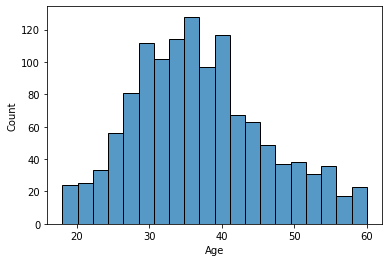

In [152]:
sns.histplot(attrition[var], bins = 20)
plt.show()

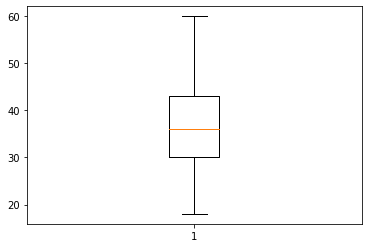

[30. 18.]
[43. 60.]


In [153]:
box = plt.boxplot(attrition[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 30대가 주축을 이루고 있음
* 18세 : 입사 가능 연령
* 60세 : 정년
* 40세 이후에 조금은 급격히 줄어드는 것으로 보아, 이때가 퇴사를 많이 하는 시점으로 보임. (보통 대기업에서 40대에 승진에서 누락되는 사람들, 새로운 분야로 진출하려는 사람들, 창업자들이 많아짐)

7) 추가 분석해 볼 사항이 있나요?

* 적절한(단순히 10살 단위가 아닌) 연령대로 분할하고, 연령대 별로 이직여부(이직율)을 검토해볼 필요가 있음
    * 직원들의 라이프사이클 파악 필요. 대졸, 입사 2~3년차, 5년차, 7년차 등 승진 및 이직을 고려하는 일반적인 시기 등 감안

### ② DistanceFromHome	

In [154]:
var = "DistanceFromHome"

1) 변수의 비즈니스 의미

> 집-직장 거리

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [155]:
print(attrition[var].isna().sum())
print(attrition[var].isna().sum()/len(attrition))
attrition.loc[(attrition[var].isna())].head()
attrition.dropna(axis=0, subset=[var], inplace=True)
print(attrition[var].isna().sum())

54
0.0432
0


* 변수 "DistanceFromHome"에서 NaN의 비율은 대략 0.04%로 중요성이 낮아보임
* 혹은 근무지와 거리를 측정할 수 없을정도로 가까워 미입력 가능성이 있음
* 1을 입력하거나 삭제

4) 기초통계량(수치화)

In [156]:
attrition[var].describe()

count    1196.000000
mean        9.258361
std         8.166016
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

5) 분포 확인(시각화)

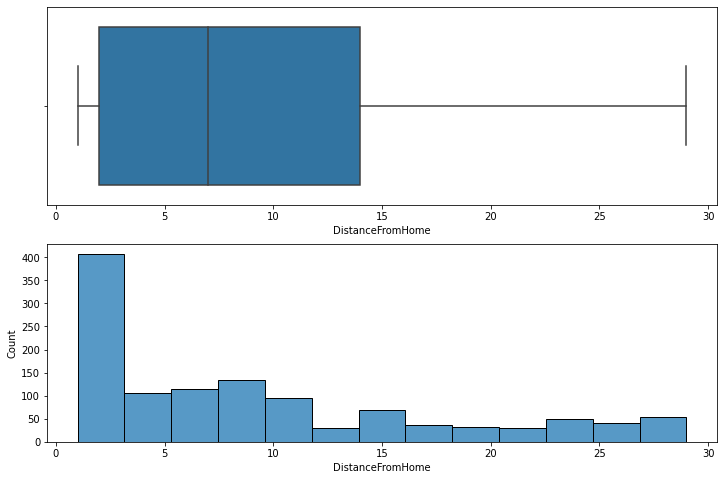

In [157]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.boxplot(x = var, data=attrition)
plt.subplot(2, 1 ,2)
sns.histplot(attrition[var])

plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 평균은 14마일 정도
* 대부분 1마일 이내에 거주하는것으로 보아 근처에서 거주하는것으로 보임

7) 추가 분석해 볼 사항이 있나요?

* 구간별로 나눠 이직여부를 확인

### ③ MonthlyIncome

In [158]:
var = "MonthlyIncome"

1) 변수의 비즈니스 의미

> 월급

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [159]:
attrition[var].isna().sum()

0

4) 기초통계량(수치화)

In [160]:
attrition[var].describe()

count     1196.000000
mean      6520.104515
std       4665.902253
min       1009.000000
25%       2928.250000
50%       4973.500000
75%       8420.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

5) 분포 확인(시각화)

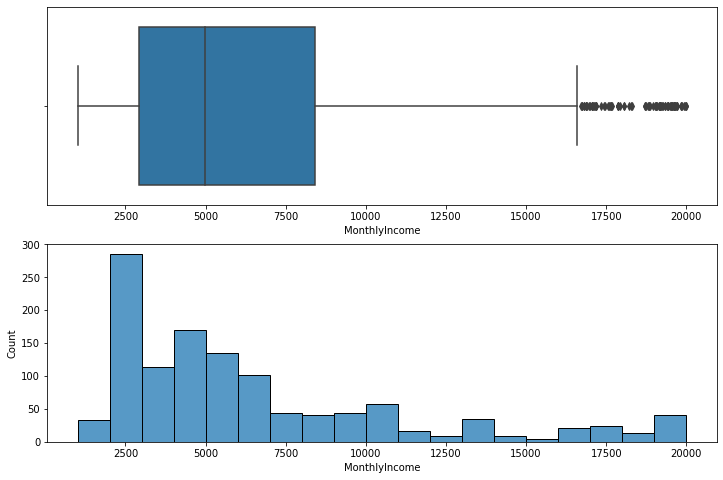

In [161]:
# monthlyIncome = pd.Series(attrition[var]).value_counts()

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.boxplot(x = var, data=attrition)
plt.subplot(2, 1 ,2)
sns.histplot(attrition[var])

plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 평균임금은 약 6500정도 하지만 중위값은 5000으로 이상치에 영향을 많이 받는것으로 보여짐

7) 추가 분석해 볼 사항이 있나요?

* 이상치를 제거하고 평균 확인 필요
* 이직한 사람들의 임금을 확인

### ④ PercentSalaryHike

In [162]:
var = "PercentSalaryHike"

1) 변수의 비즈니스 의미

> 전년대비 급여인상율

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [163]:
attrition[var].isnull().sum()

0

4) 기초통계량(수치화)

In [164]:
attrition[var].describe()

count    1196.000000
mean       15.251672
std         3.625946
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

5) 분포 확인(시각화)

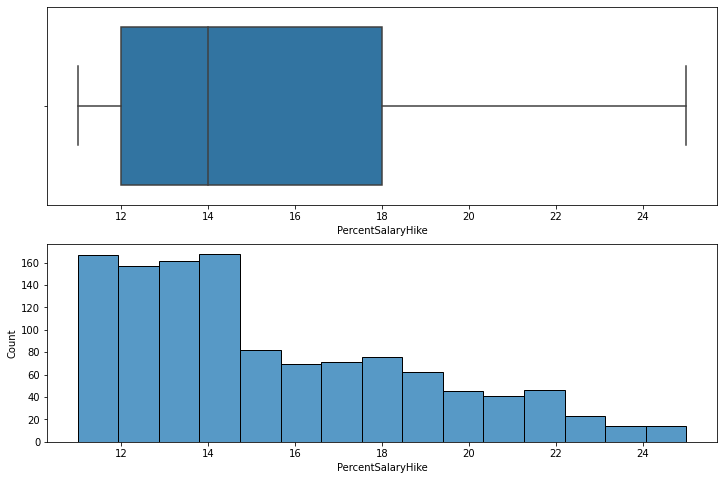

In [165]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.boxplot(x = var, data=attrition)
plt.subplot(2, 1, 2)
sns.histplot(x = var, data=attrition, bins=15)

plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 연봉인상률은 평균 14%정도


7) 추가 분석해 볼 사항이 있나요?

- 연봉인상률과 이직여부(이직율)을 검토해볼 필요가 있음 
- 년차별 연봉인상률 확인 필요

### ⑤ TotalWorkingYears

In [166]:
var = "TotalWorkingYears"

1) 변수의 비즈니스 의미

> 총 경력 연수

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [167]:
attrition[var].isnull().sum()

0

4) 기초통계량(수치화)

In [168]:
attrition[var].describe()

count    1196.000000
mean       11.330268
std         7.823821
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

5) 분포 확인(시각화)

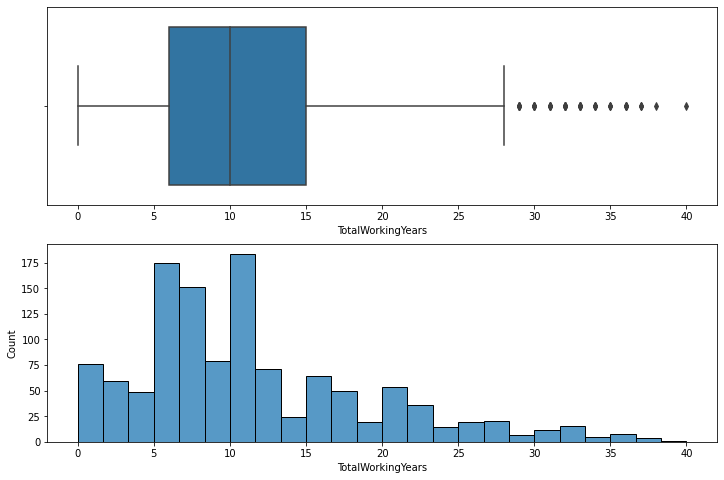

In [169]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.boxplot(x = var, data=attrition)

plt.subplot(2, 1, 2)
sns.histplot(x = var, data=attrition)

plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 총 경력 연수의 평균은 10년 정도
* 이상치 경력을 가진 사람들은 이직률 확인

7) 추가 분석해 볼 사항이 있나요?

* 적절한 구간으로 경력을 분할하고, 경력별로 이직률을 검토
* 경력별 이직률이 낮아지는 구간 파악필요

## 범주형 변수

### ① Attrition

In [170]:
var = 'Attrition'

1) 변수의 비즈니스 의미

> 직원 이직여부

2) 숫자, 범주?

In [171]:
attrition[var].unique()

array(['No', 'Yes'], dtype=object)

> * 범주형 데이터
* 범주 종류 Yes , No

3) NaN 존재 유무 및 조치방안

In [172]:
attrition[var].isna().sum()

0

> * NA 없음
* 당연히 Target이기에 NA가 있으면 안됨!


4) 가변수화 필요 여부

> * Yes , No로 되어 있음. 
* 1, 0으로 변환해야 함.

In [173]:
# 변환 코드
# attrtion['Attrition'] = np.where(attrtion['Attrition'] == 'Yes', 1, 0)

attrition['Attrition'] = attrition['Attrition'].map({'Yes' : 1, 'No' : 0})

5) 기초통계량(수치화)

In [174]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

0    1001
1     195
Name: Attrition, dtype: int64
0    0.836957
1    0.163043
Name: Attrition, dtype: float64


6) 분포 확인(시각화)

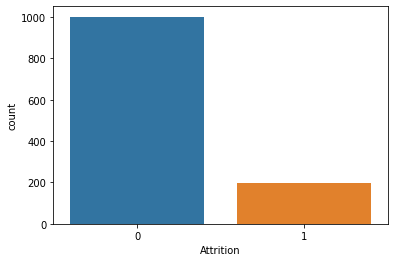

In [175]:
sns.countplot(x = var, data=attrition)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 1196명 직원
* 이직자 : 195명, 이직율 : 0.163
* 이직율이 16.3% 는 적정한가? 동종 업계 수준은? 전년대비?

8) 추가 분석해 볼 사항이 있나요?

> * Attribute가 Target 이므로, feature들과 Target 과의 관계를 살펴보게 될 것.
* 그러므로 추가 분석하고자 하는 사항은 feature들을 살펴볼 때 도출하게 될 것이라 생각됨.

### ② OverTime	

In [176]:
var = "OverTime"

1) 변수의 비즈니스 의미

> 야근여부

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [177]:
attrition[var].isnull().sum()

0

4) 가변수화 필요 여부

In [178]:
attrition[var] = attrition[var].map({"Yes" : 1, "No" : 0})

5) 기초통계량(수치화)

In [179]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/len(attrition))

0    854
1    342
Name: OverTime, dtype: int64
0    0.714047
1    0.285953
Name: OverTime, dtype: float64


6) 분포 확인(시각화)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

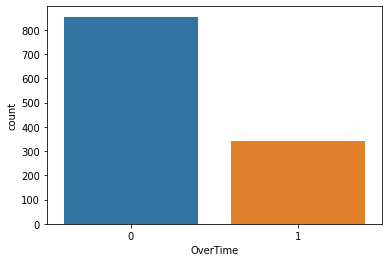

In [180]:
sns.countplot(x = var, data=attrition)

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 야근 여부가 72% 대 28%로 야근의 비율이 높지 않음
* 야근을 하는 년차를 확인

8) 추가 분석해 볼 사항이 있나요?

* 경력별 야근여부를 확인
* 야근 여부가 높은 경력별 이직률을 확인

### ③ MaritalStatus

In [181]:
var = "MaritalStatus"

1) 변수의 비즈니스 의미

> 결혼상태

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [182]:
attrition[var].isna().sum()

0

4) 가변수화 필요 여부

In [183]:
# 가변수화 필요
print(attrition[var].value_counts())
print(attrition[var].value_counts()/len(attrition))


Married     548
Single      384
Divorced    264
Name: MaritalStatus, dtype: int64
Married     0.458194
Single      0.321070
Divorced    0.220736
Name: MaritalStatus, dtype: float64


' \n가변변수화 필요\n'

5) 기초통계량(수치화)

In [184]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/len(attrition))

Married     548
Single      384
Divorced    264
Name: MaritalStatus, dtype: int64
Married     0.458194
Single      0.321070
Divorced    0.220736
Name: MaritalStatus, dtype: float64


6) 분포 확인(시각화)

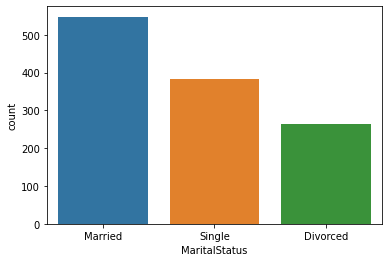

In [185]:
sns.countplot(x = var, data=attrition)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 기혼 미혼 이혼 순으로 수가 많음
* 기혼 미혼 이혼별 임금을 확인

8) 추가 분석해 볼 사항이 있나요?

* 기혼과 미혼, 이혼별 이직률을 비교
    * 혹은 두 개의 집단 (이혼과 미혼, 기혼)별 이직률을 비교
* 성별을 함께 고려해 확인 요구

### ④ JobSatisfaction

In [186]:
var = "JobSatisfaction"

1) 변수의 비즈니스 의미

> 직업 만족도

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [187]:
attrition[var].isna().sum()

0

4) 가변수화 필요 여부

In [188]:
attrition[var].unique()

array([3, 4, 1, 2])

5) 기초통계량(수치화)

In [190]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/len(attrition))

4    373
3    354
1    243
2    226
Name: JobSatisfaction, dtype: int64
4    0.311873
3    0.295987
1    0.203177
2    0.188963
Name: JobSatisfaction, dtype: float64


6) 분포 확인(시각화)

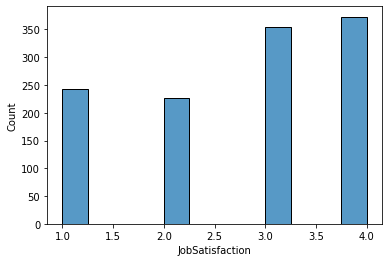

In [192]:
sns.histplot(x= var, data=attrition)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 3점 이상이 약 60% 이지만 만족도 1이 20%로 3위를 차지하고있다

8) 추가 분석해 볼 사항이 있나요?

* 이직한 사람들의 만족도
* 연봉별 만족도
* 경력 년수별 만족도